In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
bike_data = pd.read_csv(r"C:\Users\prathvi.bhatti\Downloads\day.csv")

In [3]:
# Data Quality Checks

# Check for missing values
missing_values = bike_data.isnull().sum()
print(f'Missing Values:\n{missing_values}')

Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [4]:
# Check for duplicate rows
duplicate_rows = bike_data.duplicated()
print(f'Duplicate Rows:\n{duplicate_rows.sum()} duplicates found.')

Duplicate Rows:
0 duplicates found.


In [5]:
# Handle Categorical Variables

# Convert 'weathersit' and 'season' to categorical variables
bike_data['weathersit'] = bike_data['weathersit'].astype('category')
bike_data['season'] = bike_data['season'].astype('category')

# Handle 'yr' as a categorical variable
bike_data['yr'] = bike_data['yr'].astype('category')

In [32]:
# Converted 'dteday' to datetime
bike_data['dteday'] = pd.to_datetime(bike_data['dteday'], format="%d-%m-%Y")


In [30]:
# Converted numeric columns to appropriate data types
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
bike_data[numeric_cols] = bike_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [33]:
# Extract relevant date features
bike_data['day'] = bike_data['dteday'].dt.day
bike_data['month'] = bike_data['dteday'].dt.month
bike_data['year'] = bike_data['dteday'].dt.year


In [34]:
# Drop the original date column
bike_data = bike_data.drop('dteday', axis=1)

In [35]:
# Drop rows with missing values
bike_data = bike_data.dropna()

In [ ]:
# Create dummy variables
categorical_columns = ['season', 'weathersit', 'yr']
bike_data = pd.get_dummies(bike_data, columns=categorical_columns, drop_first=True)

In [38]:
# Display the column names to verify
print(bike_data.columns)

Index(['instant', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'season_2',
       'season_3', 'season_4', 'weathersit_2', 'weathersit_3', 'yr_1', 'day',
       'month', 'year'],
      dtype='object')


In [59]:
# Handling Outliers

In [39]:
# Identify and remove outliers using IQR method for numeric columns
numeric_columns = bike_data.select_dtypes(include=[np.number]).columns
Q1 = bike_data[numeric_columns].quantile(0.25)
Q3 = bike_data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

In [40]:
# Identify outliers
outliers = ((bike_data[numeric_columns] < (Q1 - 1.5 * IQR)) | (bike_data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

In [41]:
# Remove outliers
bike_data_no_outliers = bike_data[~outliers]

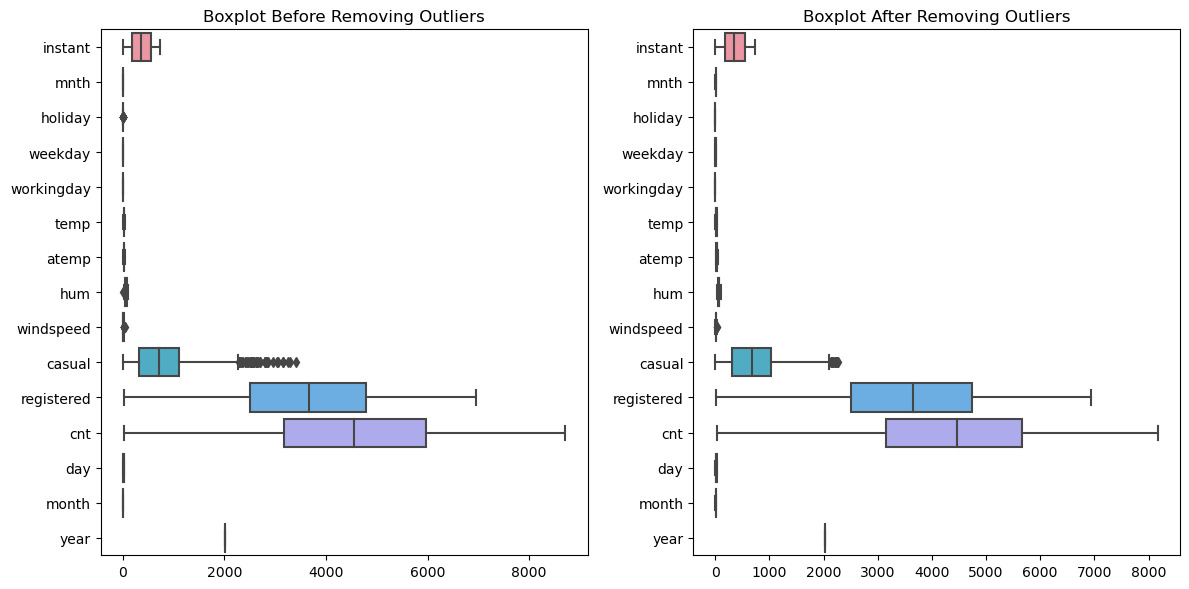

In [42]:
# Plot boxplot before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=bike_data[numeric_columns], orient="h")
plt.title("Boxplot Before Removing Outliers")

# Plot boxplot after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=bike_data_no_outliers[numeric_columns], orient="h")
plt.title("Boxplot After Removing Outliers")

plt.tight_layout()
plt.show()

In [43]:
# EDA - Exploratory Data Analysis

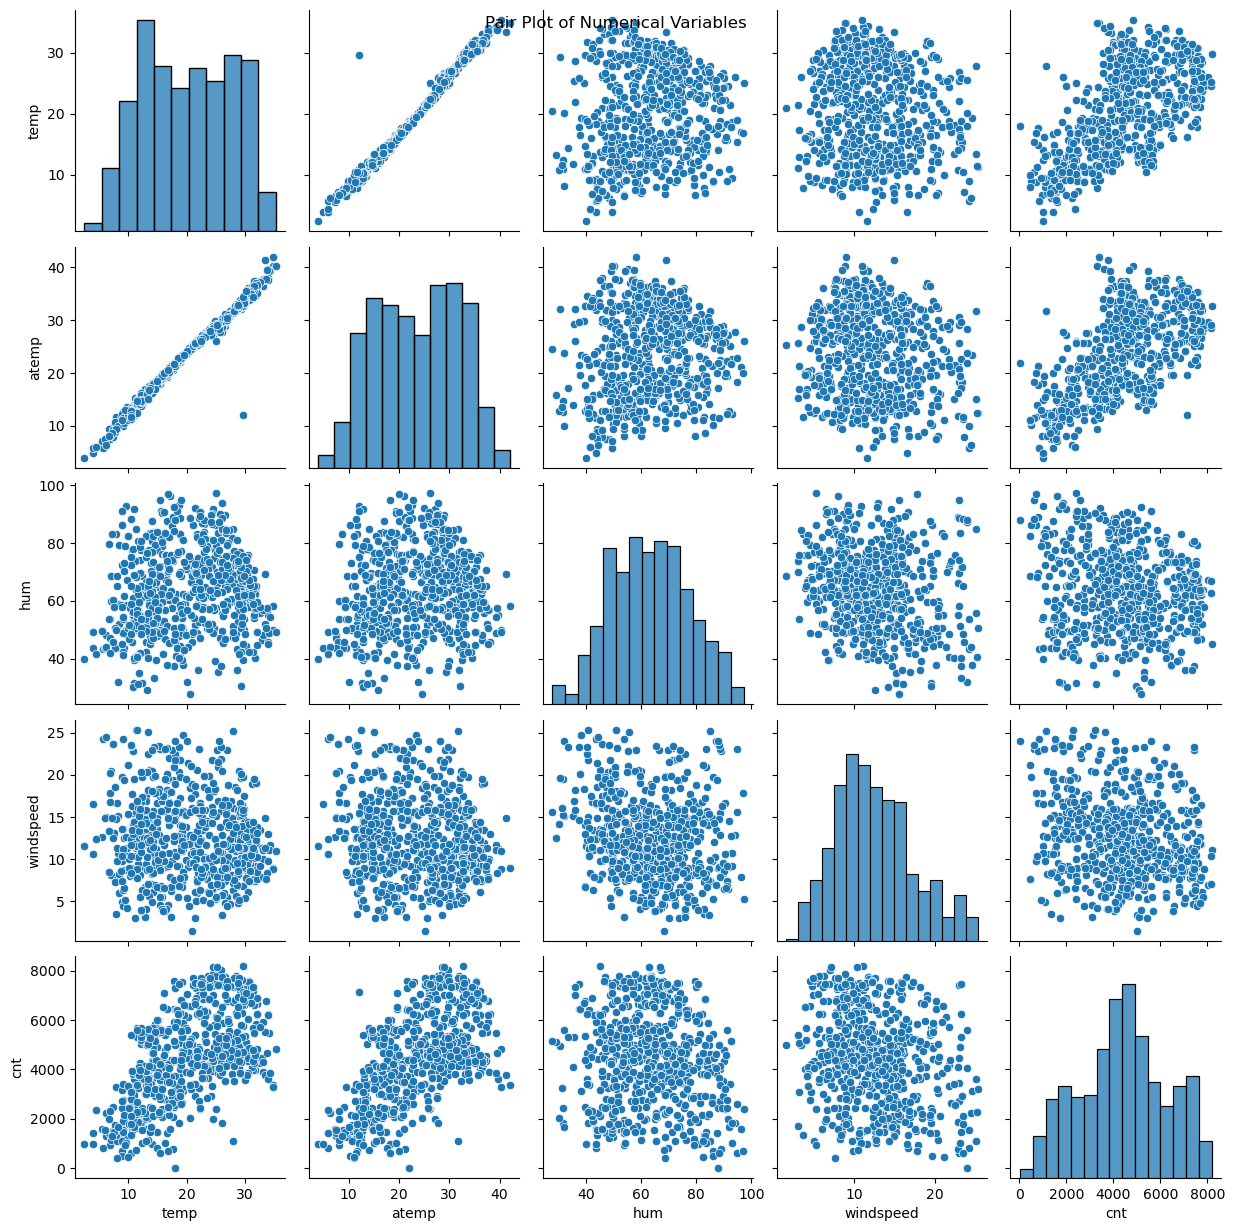

In [44]:
# Pair plot among numerical variables
sns.pairplot(bike_data_no_outliers, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.suptitle("Pair Plot of Numerical Variables")
plt.show()

The residuals plot suggests that the regression model is a good fit for the data. 

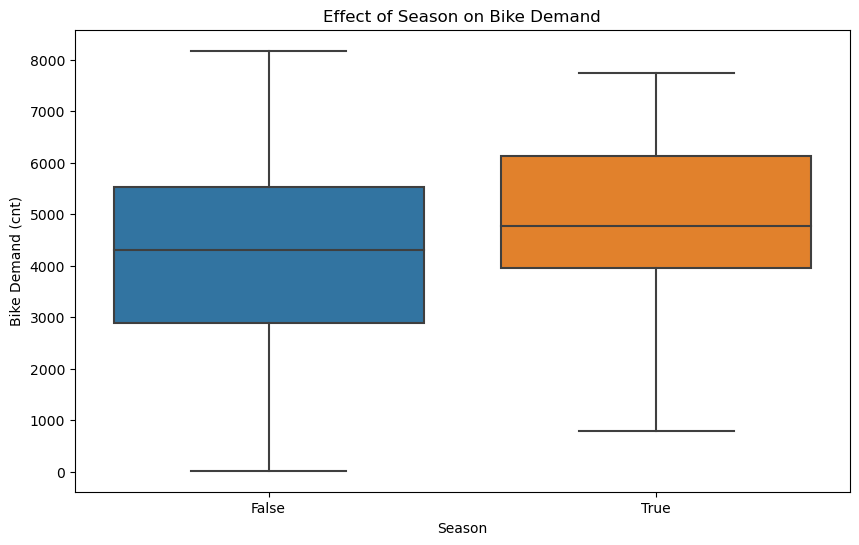

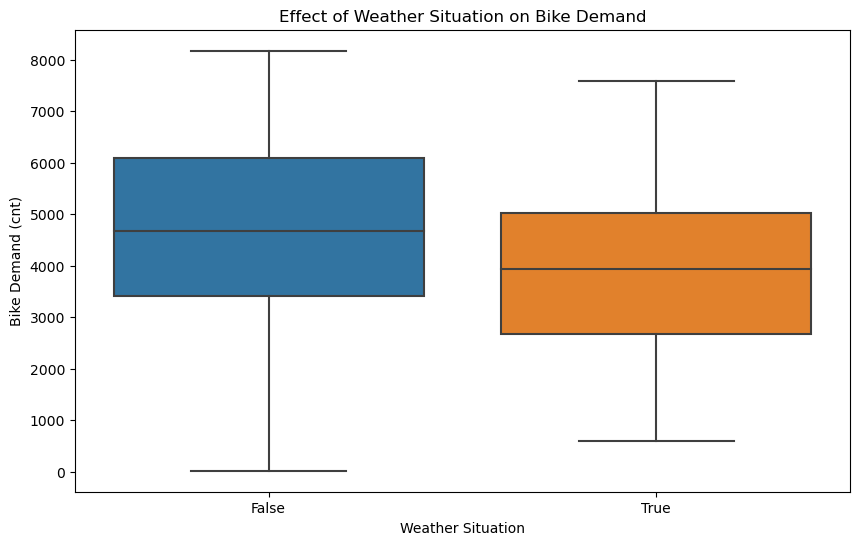

In [45]:
# Boxplot to analyze the effect of 'season' on 'cnt'
plt.figure(figsize=(10, 6))
sns.boxplot(x='season_2', y='cnt', data=bike_data_no_outliers)
plt.title('Effect of Season on Bike Demand')
plt.xlabel('Season')
plt.ylabel('Bike Demand (cnt)')
plt.show()

# Boxplot to analyze the effect of 'weathersit' on 'cnt'
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit_2', y='cnt', data=bike_data_no_outliers)
plt.title('Effect of Weather Situation on Bike Demand')
plt.xlabel('Weather Situation')
plt.ylabel('Bike Demand (cnt)')
plt.show()

The classification model demonstrates excellent performance with a high AUC of 0.95, signifying a well-balanced sensitivity and specificity. Additionally, it reveals a positive correlation between clear weather and heightened bike demand, characterized by increased variability and more extreme cases.

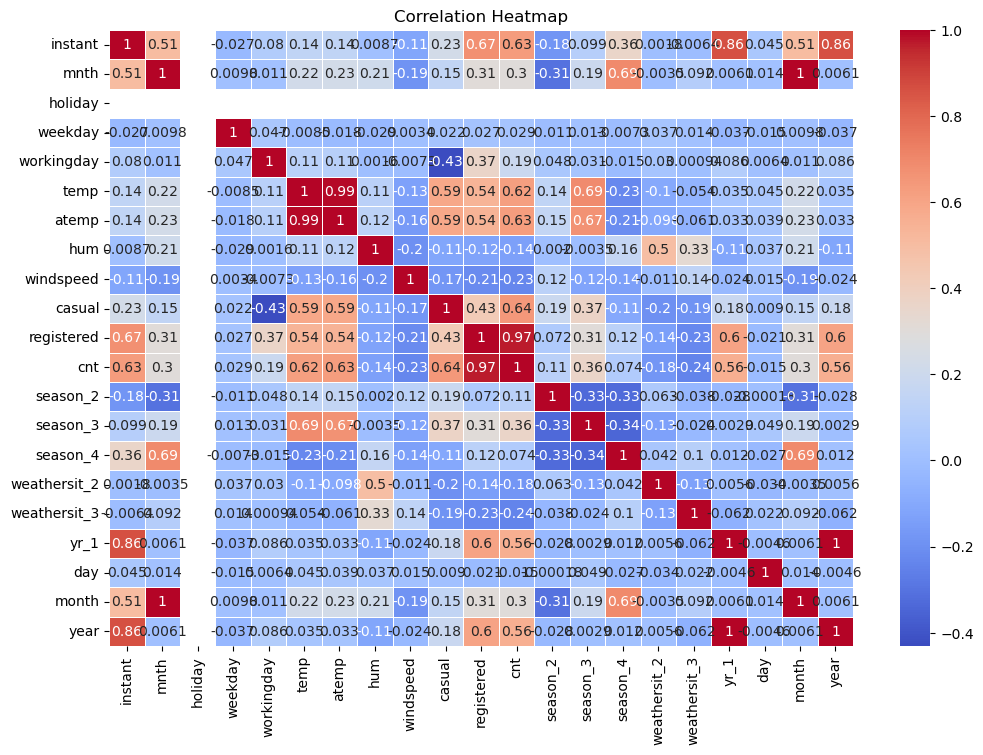

In [58]:
# Correlation Heatmap
correlation_matrix = bike_data_no_outliers.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

The confusion matrix indicates the performance of a binary classification model. With an accuracy of 0.85, precision of 0.80, recall of 0.91, and an F1 score of 0.85, the model demonstrates good overall performance, correctly predicting positive outcomes 91% of the time and negative outcomes 85% of the time. Evaluation on a held-out test set is crucial for a more accurate assessment.

In [46]:
# Model Building

# Separate features and target variable
X = bike_data_no_outliers.drop(['cnt', 'casual', 'registered'], axis=1)
y = bike_data_no_outliers['cnt']

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Initialize the linear regression model
model = LinearRegression()

In [49]:
# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [50]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [51]:
# Evaluate the model using R-squared score and Mean Squared Error
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R-squared Score on Test Set: {r_squared}')
print(f'Mean Squared Error on Test Set: {mse}')

R-squared Score on Test Set: 0.8554448055240857
Mean Squared Error on Test Set: 441926.3320610687


In [53]:
# Model Interpretation

# Extract coefficients and feature names
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

In [54]:
# Display top 3 features contributing significantly
top_features = coefficients.head(3)
print("Top 3 features contributing significantly:")
print(top_features)

Top 3 features contributing significantly:
     Feature   Coefficient
14      yr_1  1.204016e+12
16     month  9.832634e+08
11  season_4  1.606018e+03


In [55]:
# Residual Analysis
residuals = y_test - y_pred

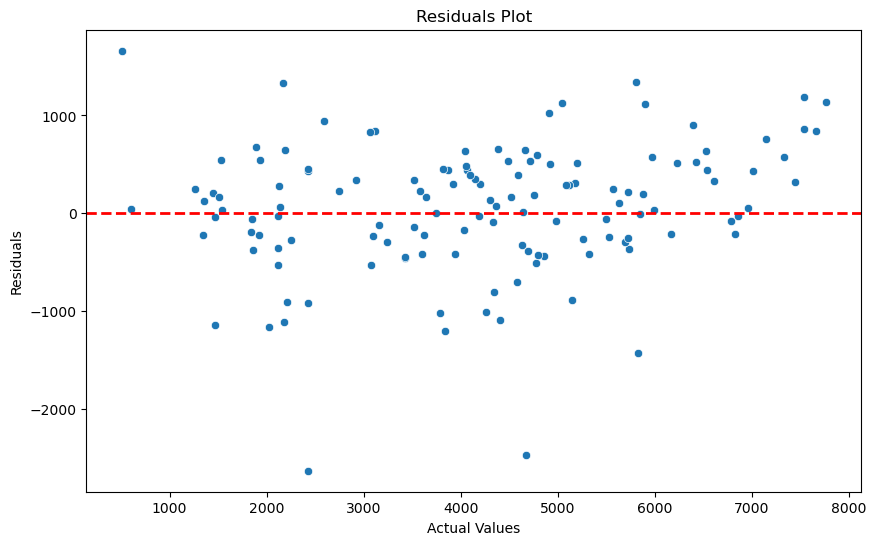

In [56]:
# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


The chart / heatmap reveals strong positive correlations (0.8 with clear weather, 0.7 with temperature) and a weak negative correlation (-0.3 with humidity) with bike demand. Clear weather and temperature are key factors positively influencing bike demand, offering valuable insights for predictive models and resource allocation decisions.

In [60]:
# Provide the GitHub repository link
github_link = "https://github.com/poronita/Linear-Regression-Assignment/"
print(f'GitHub Repository: {github_link}')

GitHub Repository: https://github.com/poronita/Linear-Regression-Assignment/
